# Developing plotting routines to visualize the results of the depth losses simulations

In [54]:
import numpy as np
from oceantracker.post_processing.read_output_files.load_output_files import load_grid
from oceantracker.post_processing.read_output_files.load_output_files import get_case_info_files_from_dir
from oceantracker.post_processing.read_output_files.load_output_files import read_case_info_file
from oceantracker.post_processing.read_output_files.load_output_files import load_track_data

from oceantracker.post_processing.transect_projection.transect import Transect
from oceantracker.post_processing.plotting.plot_transects import plot_projected_verticle_tracks
from oceantracker.post_processing.plotting.plot_tracks import plot_tracks
from oceantracker.post_processing.plotting.plot_tracks import animate_particles


import datetime
from matplotlib.animation import FuncAnimation
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
import json
import seaborn as sns

## 1. Construction transect poligons and planes

In [ ]:
path_to_dir = '/scratch/local1/output/22_11_01_depth_losses_v22'
case_info = get_case_info_files_from_dir(path_to_dir)[0]
grid = load_grid(case_info)

In [ ]:
def poly_from_left_right(left_right):
    poligons = np.zeros((len(left_right)//2-1,4,2))
    for ii in range(len(poligons)):
        poligons[ii,0,:] = left_right[ii*2+0]
        poligons[ii,1,:] = left_right[ii*2+1]
        poligons[ii,2,:] = left_right[ii*2+3]
        poligons[ii,3,:] = left_right[ii*2+2]

    return poligons

In [ ]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(15,15))

ax.tripcolor(grid['x'][:,0],grid['x'][:,1],grid['triangles'],grid['water_depth'],shading='gouraud')

# ax.set_xlim([470000, 535000])
# ax.set_ylim([5950000, 5990000])

# ax.set_xlim([558060, 573004])
# ax.set_ylim([5921445, 5935963])

ax.set_aspect('equal')

# click and print point
def onclick(event):
    print(f'[{int(event.xdata)}, {int(event.ydata)}],')

cid = fig.canvas.mpl_connect('button_press_event', onclick)



# for jj,poly in enumerate(sueder_polies):
#     for ii in range(len(poly)):
#         x = [poly[ii,0],poly[(ii+1)%4,0]]
#         y = [poly[ii,1],poly[(ii+1)%4,1]]
#         plt.plot(x,y)





### Bunthaus

In [ ]:
bunthaus = np.array([
    [570899, 5923097],
    [571347, 5923779],
    [570490, 5924110],
    [570899, 5924246],
])

halfway_point = bunthaus[0] + (bunthaus[1] - bunthaus[0])/1.7

fig, ax = plt.subplots(figsize=(10,10))

ax.tripcolor(grid['x'][:,0],grid['x'][:,1],grid['triangles'],grid['water_depth'],shading='gouraud')

ax.set_xlim([560000, 575000])
ax.set_ylim([5920000, 5935000])

ax.set_aspect('equal')

for point in bunthaus:
    ax.scatter(point[0], point[1], c='r')
ax.scatter(halfway_point[0], halfway_point[1], c='k')

In [ ]:
bunthaus_norder = np.array([
     bunthaus[1],
     halfway_point,
    bunthaus[3],
    bunthaus[2],
])

print(bunthaus_norder)

### upstream

In [ ]:
left_right_upstream = np.array([
    [586877, 5920867],
    [586490, 5921448],
    [585806, 5919964],
    [585419, 5920970],
    [584283, 5919422],
    [583496, 5920300],
    [583625, 5918338],
    [582761, 5918609],
    [583225, 5917203],
    [582270, 5917629],
    [582451, 5916429],
    [582038, 5917422],
    [581600, 5916480],
    [581651, 5917293],
    [580567, 5916661],
    [580825, 5917474],
    [580000, 5916738],
    [580270, 5917641],
    [579522, 5916970],
    [579393, 5917977],
    [578658, 5916635],
    [578529, 5917461],
    [577806, 5916803],
    [578000, 5917474],
    [577058, 5917267],
    [577470, 5917809],
    [576438, 5917925],
    [576967, 5918300],
    [575909, 5918880],
    [576516, 5919164],
    [575212, 5919474],
    [575509, 5920209],
    [574787, 5919564],
    [574812, 5920312],
    [574180, 5919667],
    [574477, 5920390],
    [573187, 5919900],
    [574000, 5920958],
    [572825, 5921229],
    [573445, 5921577],
    [572348, 5921848],
    [573148, 5922441],
    [571883, 5922287],
    [572412, 5922958],
    [571367, 5922906],
    [571806, 5923603],
])

upstream_polies = poly_from_left_right(left_right_upstream)

In [ ]:

fig, ax = plt.subplots(figsize=(10,10))

ax.tripcolor(grid['x'][:,0],grid['x'][:,1],grid['triangles'],grid['water_depth'],shading='gouraud')

ax.set_xlim([570000, 590000])
ax.set_ylim([5910000, 5925000])

ax.set_aspect('equal')

for point in left_right_upstream:
    ax.plot(point[0],point[1],'ro')

for jj,poly in enumerate(upstream_polies):
    for ii in range(len(poly)):
        x = [poly[ii,0],poly[(ii+1)%4,0]]
        y = [poly[ii,1],poly[(ii+1)%4,1]]
        plt.plot(x,y)


### norderelbe

In [ ]:
left_right_norderelbe = np.array([
    [570814,5924844],
[570334,5924805],
[570853,5925558],
[570256,5925454],
[570477,5926207],
[570074,5925844],
[570139,5926688],
[569646,5926428],
# [570035,5927298],
[570035,5927298],
[569373,5927415],
[569970,5927883],
[568931,5928532],
[570165,5928558],
[569581,5928831],
[570503,5929363],
[569892,5929545],
[570503,5930051],
[569983,5929987],
[570295,5930571],
[569918,5930272],
[569970,5930935],
[569620,5930636],
[569542,5931350],
[569230,5930948],
[569152,5931545],
[568983,5931207],
[568762,5931714],
[568659,5931376],
[568373,5931948],
[568178,5931597],
[567762,5932246],
[567568,5931857],
[567204,5932532],
[566983,5932168],
[566633,5932610],
[566568,5932220],
[565866,5932701],
[565698,5932311],
[565256,5932935],
[565035,5932532],
[564672,5933324],
[564477,5932857],
[563905,5933480],
[563892,5933000],
[562996,5933298],
[563178,5932870],
[562386,5933207],
[562451,5932740],
[561905,5933155],
[561944,5932701],
[561165,5933194],
[561191,5932675],
])


left_right_norderelbe = np.vstack((bunthaus_norder, left_right_norderelbe))

norder_polies = poly_from_left_right(left_right_norderelbe)


In [ ]:

fig, ax = plt.subplots(figsize=(10,10))

ax.tripcolor(grid['x'][:,0],grid['x'][:,1],grid['triangles'],grid['water_depth'],shading='gouraud')

ax.set_xlim([560000, 575000])
ax.set_ylim([5920000, 5935000])

ax.set_aspect('equal')

for point in left_right_norderelbe:
    ax.plot(point[0],point[1],'ro')

for jj,poly in enumerate(norder_polies):
    for ii in range(len(poly)):
        x = [poly[ii,0],poly[(ii+1)%4,0]]
        y = [poly[ii,1],poly[(ii+1)%4,1]]
        plt.plot(x,y)


### downstream

In [ ]:
left_right_downstream = np.array([
    [560432, 5932511],
    [560354, 5933324],
    [558690, 5932550],
    [558729, 5933517],
    [557645, 5932666],
    [557645, 5933556],
    [556135, 5932937],
    [556290, 5933943],
    [554625, 5930846],
    [555516, 5934408],
    [551683, 5931388],
    [552535, 5935337],
    [548587, 5931969],
    [549129, 5935724],
    [546380, 5932472],
    [546883, 5935956],
    [541658, 5934291],
    [544329, 5938743],
    [537593, 5936382],
    [541038, 5940098],
    [535503, 5938782],
    [538948, 5942304],
    [532406, 5942227],
    [538096, 5944666],
    [531129, 5945285],
    [538135, 5947337],
    [529619, 5947104],
    [537554, 5948614],
    [527722, 5948924],
    [535425, 5952988],
    [527103, 5950124],
    [531825, 5954846],
    [526053, 5952918],
    #
    [529855, 5955322],
    [524823, 5954763],
    [530023, 5957670],
    [523202, 5957223],
    [528458, 5960075],
    [521412, 5959907],
    [528122, 5961976],
    [519903, 5961249],
    [527731, 5964492],
    [519008, 5962423],
    [524040, 5967232],
    [518729, 5964156],
    [522419, 5969245],
    [517219, 5965107],
    [521692, 5970307],
    [516101, 5965387],
    [518561, 5972655],
    [514703, 5966337],
    [515821, 5973662],
    [513081, 5966505],
    [513193, 5974165],
    [510174, 5966729],
    [510118, 5974501],
    [507434, 5966896],
    [506372, 5974612],
    [504135, 5962815],
    [499326, 5975116],
    [499606, 5962535],
    [497593, 5974724],
    [494630, 5961696],
    [496531, 5975060],
    [487417, 5961976],
    [495356, 5978470],
    #
    [483950, 5963486],
    [494909, 5978862],
    [478638, 5965219],
    [494574, 5979924],
    [477520, 5968630],
    [494518, 5980707],
    [477240, 5970419],
    [492002, 5985236],
])

downstream_polies = poly_from_left_right(left_right_downstream)


In [ ]:
fig, ax = plt.subplots(figsize=(15,15))

ax.tripcolor(grid['x'][:,0],grid['x'][:,1],grid['triangles'],grid['water_depth'],shading='gouraud')

# ax.set_xlim([520000, 565000])
# ax.set_ylim([5930000, 5955500])

ax.set_aspect('equal')

for jj,poly in enumerate(downstream_polies):
    for ii in range(len(poly)):
        x = [poly[ii,0],poly[(ii+1)%4,0]]
        y = [poly[ii,1],poly[(ii+1)%4,1]]
        plt.plot(x,y)

In [ ]:
sueder_elbe = np.array([
[570899, 5923097],
[571162, 5923498],
[570124, 5923696],
[570484, 5924108],
[569635, 5923979],
[570201, 5924789],
[569173, 5924532],
[569841, 5925406],
[568748, 5924802],
[569160, 5925933],
[568209, 5925046],
[568479, 5926345],
[567900, 5925085],
[567682, 5926280],
[567463, 5924841],
[567142, 5926036],
[566769, 5924648],
[566602, 5926023],
[566190, 5924725],
[566370, 5925895],
[565650, 5924905],
[566023, 5926075],
[565380, 5925380],
[565483, 5925792],
[565008, 5925522],
[565123, 5925882],
[564609, 5925740],
[564776, 5926036],
[564198, 5925985],
[564378, 5926293],
[563812, 5926293],
[563954, 5926627],
[563516, 5926576],
[563825, 5926885],
[563311, 5926872],
[563606, 5927090],
[563092, 5927206],
[563491, 5927437],
[562925, 5927617],
[563285, 5927874],
[562167, 5927874],
[562835, 5928479],
[561832, 5928504],
[562694, 5928826],
[561961, 5929276],
[562629, 5929378],
[562051, 5929931],
[562450, 5929944],
[562025, 5930741],
[562424, 5930728],
[562038, 5931512],
[562450, 5931589],
[561948, 5931924],
[562398, 5932117],
[561742, 5932258],
[562192, 5932502],
[561267, 5932682],
[562000, 5932721],
[561203, 5932669],
[561498, 5933441],
])

sueder_polies = poly_from_left_right(sueder_elbe)

fig, ax = plt.subplots(figsize=(15,15))

ax.tripcolor(grid['x'][:,0],grid['x'][:,1],grid['triangles'],grid['water_depth'],shading='gouraud')

# ax.set_xlim([520000, 565000])
# ax.set_ylim([5930000, 5955500])

ax.set_aspect('equal')

for jj,poly in enumerate(sueder_polies):
    for ii in range(len(poly)):
        x = [poly[ii,0],poly[(ii+1)%4,0]]
        y = [poly[ii,1],poly[(ii+1)%4,1]]
        plt.plot(x,y)


### sanity checking

In [ ]:
left_right_suederelbe = np.array([
# [570899, 5923097],
# [571162, 5923498],
[570124, 5923696],
[570484, 5924108],
[569635, 5923979],
[570201, 5924789],
[569173, 5924532],
[569841, 5925406],
[568748, 5924802],
[569160, 5925933],
[568209, 5925046],
[568479, 5926345],
[567900, 5925085],
[567682, 5926280],
[567463, 5924841],
[567142, 5926036],
[566769, 5924648],
[566602, 5926023],
[566190, 5924725],
[566370, 5925895],
[565650, 5924905],
[566023, 5926075],
[565380, 5925380],
[565483, 5925792],
[565008, 5925522],
[565123, 5925882],
[564609, 5925740],
[564776, 5926036],
[564198, 5925985],
[564378, 5926293],
[563812, 5926293],
[563954, 5926627],
[563516, 5926576],
[563825, 5926885],
[563311, 5926872],
[563606, 5927090],
[563092, 5927206],
[563491, 5927437],
[562925, 5927617],
[563285, 5927874],
[562167, 5927874],
[562835, 5928479],
[561832, 5928504],
[562694, 5928826],
[561961, 5929276],
[562629, 5929378],
[562051, 5929931],
[562450, 5929944],
[562025, 5930741],
[562424, 5930728],
[562038, 5931512],
[562450, 5931589],
[561948, 5931924],
[562398, 5932117],
[561742, 5932258],
[562192, 5932502],
[561267, 5932682],
[562000, 5932721],
[561203, 5932669],
[561161, 5933441],
])

left_right_downstream = np.array([
    [560432, 5932511],
    [560354, 5933324],
    [558690, 5932550],
    [558729, 5933517],
    [557645, 5932666],
    [557645, 5933556],
    [556135, 5932937],
    [556290, 5933943],
    [554625, 5930846],
    [555516, 5934408],
    [551683, 5931388],
    [552535, 5935337],
    [548587, 5931969],
    [549129, 5935724],
    [546380, 5932472],
    [546883, 5935956],
    [541658, 5934291],
    [544329, 5938743],
    [537593, 5936382],
    [541038, 5940098],
    [535503, 5938782],
    [538948, 5942304],
    [532406, 5942227],
    [538096, 5944666],
    [531129, 5945285],
    [538135, 5947337],
    [529619, 5947104],
    [537554, 5948614],
    [527722, 5948924],
    [535425, 5952988],
    [527103, 5950124],
    [531825, 5954846],
    [526053, 5952918],
    #
    [529855, 5955322],
    [524823, 5954763],
    [530023, 5957670],
    [523202, 5957223],
    [528458, 5960075],
    [521412, 5959907],
    [528122, 5961976],
    [519903, 5961249],
    [527731, 5964492],
    [519008, 5962423],
    [524040, 5967232],
    [518729, 5964156],
    [522419, 5969245],
    [517219, 5965107],
    [521692, 5970307],
    [516101, 5965387],
    [518561, 5972655],
    [514703, 5966337],
    [515821, 5973662],
    [513081, 5966505],
    [513193, 5974165],
    [510174, 5966729],
    [510118, 5974501],
    [507434, 5966896],
    [506372, 5974612],
    [504135, 5962815],
    [499326, 5975116],
    [499606, 5962535],
    [497593, 5974724],
    [494630, 5961696],
    [496531, 5975060],
    [487417, 5961976],
    [495356, 5978470],
    #
    [483950, 5963486],
    [494909, 5978862],
    [478638, 5965219],
    [494574, 5979924],
    [477520, 5968630],
    [494518, 5980707],
    [477240, 5970419],
    [492002, 5985236],
])


left_right_norderelbe = np.array([
[ 570899,5924246],
[ 570490,5924110],
[570814,5924844],
[570334,5924805],
[570853,5925558],
[570256,5925454],
[570477,5926207],
[570074,5925844],
[570139,5926688],
[569646,5926428],
# [570035,5927298],
[570035,5927298],
[569373,5927415],
[569970,5927883],
[568931,5928532],
[570165,5928558],
[569581,5928831],
[570503,5929363],
[569892,5929545],
[570503,5930051],
[569983,5929987],
[570295,5930571],
[569918,5930272],
[569970,5930935],
[569620,5930636],
[569542,5931350],
[569230,5930948],
[569152,5931545],
[568983,5931207],
[568762,5931714],
[568659,5931376],
[568373,5931948],
[568178,5931597],
[567762,5932246],
[567568,5931857],
[567204,5932532],
[566983,5932168],
[566633,5932610],
[566568,5932220],
[565866,5932701],
[565698,5932311],
[565256,5932935],
[565035,5932532],
[564672,5933324],
[564477,5932857],
[563905,5933480],
[563892,5933000],
[562996,5933298],
[563178,5932870],
[562386,5933207],
[562451,5932740],
[561905,5933155],
[561944,5932701],
[561165,5933194],
[561191,5932675],
])

buffer = deepcopy(left_right_norderelbe)

left_right_norderelbe = np.zeros_like(buffer)
# take all the odd elements and put them into the even elements
left_right_norderelbe[0::2] = buffer[1::2]
left_right_norderelbe[1::2] = buffer[0::2]

left_right_upstream = np.array([

    [586877, 5920867],
    [586490, 5921448],
    [585806, 5919964],
    [585419, 5920970],
    [584283, 5919422],
    [583496, 5920300],
    [583625, 5918338],
    [582761, 5918609],
    [583225, 5917203],
    [582270, 5917629],
    [582451, 5916429],
    [582038, 5917422],
    [581600, 5916480],
    [581651, 5917293],
    [580567, 5916661],
    [580825, 5917474],
    [580000, 5916738],
    [580270, 5917641],
    [579522, 5916970],
    [579393, 5917977],
    [578658, 5916635],
    [578529, 5917461],
    [577806, 5916803],
    [578000, 5917474],
    [577058, 5917267],
    [577470, 5917809],
    [576438, 5917925],
    [576967, 5918300],
    [575909, 5918880],
    [576516, 5919164],
    [575212, 5919474],
    [575509, 5920209],
    [574787, 5919564],
    [574812, 5920312],
    [574180, 5919667],
    [574477, 5920390],
    [573187, 5919900],
    [574000, 5920958],
    [572825, 5921229],
    [573445, 5921577],
    [572348, 5921848],
    [573148, 5922441],
    [571883, 5922287],
    [572412, 5922958],
    [571367, 5922906],
    [571806, 5923603],

    [570899, 5923097],
    [571347, 5923779],
])



upstream_planes = np.array([
    [586663, 5921297],
    [585547, 5920413],
    [585678, 5920471],
    [583925, 5919660],
    [584084, 5919761],
    [583012, 5918458],
    [583114, 5918588],
    [582621, 5917386],
    [582723, 5917502],
    [582100, 5917009],
    [582274, 5917053],
    [581578, 5916922],
    [581694, 5916893],
    [580637, 5917067],
    [580767, 5917009],
    [580072, 5917226],
    [580202, 5917183],
    [579391, 5917284],
    [579579, 5917313],
    [578522, 5917024],
    [578667, 5917053],
    [577827, 5917111],
    [577971, 5917038],
    [577189, 5917560],
    [577305, 5917444],
    [576653, 5918168],
    [576726, 5917994],
    [576146, 5919095],
    [576233, 5918950],
    [575350, 5920008],
    [575495, 5919921],
    [574727, 5920066],
    [574857, 5920051],
    [574278, 5920066],
    [574408, 5920008],
    [573531, 5920435],
    [573608, 5920358],
    [572999, 5921378],
    [573042, 5921275],
    [572682, 5922184],
    [572759, 5922081],
    [572219, 5922809],
    [572271, 5922715],
    [571560, 5923323],
    [571637, 5923255],
    [571095, 5923526],
        [571286, 5923601],
])

norder_planes = np.array([
    # [571286, 5923601],
    
[570739, 5924226],
[570758, 5924159],
[570566, 5924860],
[570585, 5924774],
[570498, 5925524],
[570518, 5925456],
[570306, 5926110],
[570345, 5926043],
[569931, 5926619],
[569979, 5926562],
[569768, 5927379],
[569777, 5927321],
[569768, 5928032],
[569739, 5927975],
[569970, 5928676],
[569950, 5928619],
[570268, 5929474],
[570239, 5929407],
[570229, 5930041],
[570248, 5929993],
[570056, 5930435],
[570085, 5930358],
[569758, 5930791],
[569797, 5930733],
[569345, 5931147],
[569393, 5931118],
[569028, 5931377],
[569076, 5931329],
[568691, 5931560],
[568749, 5931531],
[568249, 5931810],
[568316, 5931781],
[567663, 5932098],
[567721, 5932060],
[567067, 5932358],
[567134, 5932329],
[566577, 5932435],
[566644, 5932425],
[565750, 5932511],
[565817, 5932483],
[565125, 5932771],
[565212, 5932732],
[564549, 5933098],
[564606, 5933050],
[563866, 5933242],
[563934, 5933242],
[563059, 5933050],
[563136, 5933098],
[562376, 5932954],
[562463, 5932934],
# [561886, 5932944],
[561973, 5932934],
[561954, 5932927],
# [561144, 5932959],
])

sueder_planes = np.array([
    # [571112, 5923361],
    [570313, 5923965],
    [570359, 5923912],
    [569844, 5924333],
    [569891, 5924286],
    [569395, 5924876],
    [569451, 5924839],
    [568880, 5925279],
    [568954, 5925232],
    [568280, 5925532],
    [568346, 5925513],
    [567793, 5925504],
    [567859, 5925523],
    [567269, 5925410],
    [567334, 5925438],
    [566669, 5925307],
    [566735, 5925307],
    [566257, 5925363],
    [566332, 5925335],
    [565798, 5925476],
    [565855, 5925466],
    [565414, 5925607],
    [565452, 5925588],
    [565040, 5925710],
    [565077, 5925682],
    [564656, 5925888],
    [564712, 5925850],
    [564262, 5926160],
    [564300, 5926122],
    [563860, 5926469],
    [563897, 5926431],
    [563626, 5926721],
    [563663, 5926684],
    [563457, 5927012],
    [563476, 5926946],
    [563298, 5927349],
    [563317, 5927302],
    [563092, 5927780],
    [563120, 5927733],
    [562624, 5928323],
    [562652, 5928276],
    [562427, 5928754],
    [562436, 5928707],
    [562277, 5929362],
    [562305, 5929288],
    [562277, 5929962],
    [562258, 5929906],
    [562240, 5930767],
    [562240, 5930720],
    [562240, 5931582],
    [562249, 5931526],
    [562174, 5932069],
    [562202, 5931985],
    [561968, 5932416],
    [562015, 5932359],
    [561650, 5932725],
    [561715, 5932668],
    [561144, 5932959],
    ])

downstream_planes = np.array([
        # [561144, 5932959],
    [561197, 5932912],
    [560470, 5932875],
    [560359, 5932883],
[558583, 5932973],
[558876, 5932940],
[557542, 5933103],
[557770, 5933038],
[556143, 5933428],
[556306, 5933396],
[555232, 5933624],
[555427, 5933591],
[552271, 5934567],
[552467, 5934469],
[548953, 5935088],
[549181, 5935055],
[546708, 5935413],
[546871, 5935380],
[542641, 5936161],
[542837, 5936064],
[539616, 5938699],
[539713, 5938601],
[537306, 5940748],
[537436, 5940586],
[534801, 5943351],
[534866, 5943189],
[533792, 5946149],
[533825, 5945954],
[533369, 5947873],
[533402, 5947678],
[531970, 5951257],
[532100, 5951094],
[530083, 5953241],
[530246, 5953111],
[528359, 5954510],
# [528522, 5954348],
[528561, 5954234],
[526689, 5956107],
[526985, 5955762],
[525753, 5958866],
[525999, 5958423],
[524915, 5961231],
[525063, 5960837],
[524225, 5963153],
[524422, 5962857],
[522205, 5965814],
[522550, 5965518],
[520628, 5967144],
[521022, 5966947],
[519446, 5967982],
[519840, 5967883],
[517228, 5969361],
[517623, 5969263],
[515110, 5970150],
[515504, 5970051],
[512991, 5970445],
[513385, 5970544],
[510034, 5970298],
[510281, 5970445],
[506832, 5970100],
[507226, 5970199],
[501855, 5968031],
[502200, 5968179],
[498603, 5967144],
[499145, 5967243],
[495154, 5966651],
[495646, 5966553],
[488945, 5965666],
[489339, 5965715],
[485644, 5966208],
[485940, 5965961],
[482343, 5968819],
[482441, 5968573],
[480618, 5971086],
[480914, 5970642],
[480830, 5970800],
# [479590, 5972880],
])

In [ ]:

# stack left_right
left_right = np.vstack((left_right_upstream, left_right_norderelbe, left_right_downstream))
full_norder_polies = poly_from_left_right(left_right)

full_norder_planes = np.vstack((upstream_planes, norder_planes, downstream_planes))
full_norder_planes = np.reshape(full_norder_planes[:-1], (-1,2,2))

# # stack left_right
left_right = np.vstack((left_right_upstream, left_right_suederelbe, left_right_downstream))
# left_right = np.vstack((left_right_upstream, left_right_suederelbe))
full_sueder_polies = poly_from_left_right(left_right)

full_sueder_planes = np.vstack((upstream_planes, sueder_planes, downstream_planes))
# full_sueder_planes = np.vstack((upstream_planes, sueder_planes))
full_sueder_planes = np.reshape(full_sueder_planes, (-1,2,2))



In [ ]:
# print full_norder_planes to be copy and paseted into the code
print("array(", repr(full_sueder_planes).replace("array(", "").replace(")", ""), ")")


In [ ]:
full_norder_planes = np.array( [
        [[ 586663, 5921297],
        [ 585547, 5920413]],

       [[ 585678, 5920471],
        [ 583925, 5919660]],

       [[ 584084, 5919761],
        [ 583012, 5918458]],

       [[ 583114, 5918588],
        [ 582621, 5917386]],

       [[ 582723, 5917502],
        [ 582100, 5917009]],

       [[ 582274, 5917053],
        [ 581578, 5916922]],

       [[ 581694, 5916893],
        [ 580637, 5917067]],

       [[ 580767, 5917009],
        [ 580072, 5917226]],

       [[ 580202, 5917183],
        [ 579391, 5917284]],

       [[ 579579, 5917313],
        [ 578522, 5917024]],

       [[ 578667, 5917053],
        [ 577827, 5917111]],

       [[ 577971, 5917038],
        [ 577189, 5917560]],

       [[ 577305, 5917444],
        [ 576653, 5918168]],

       [[ 576726, 5917994],
        [ 576146, 5919095]],

       [[ 576233, 5918950],
        [ 575350, 5920008]],

       [[ 575495, 5919921],
        [ 574727, 5920066]],

       [[ 574857, 5920051],
        [ 574278, 5920066]],

       [[ 574408, 5920008],
        [ 573531, 5920435]],

       [[ 573608, 5920358],
        [ 572999, 5921378]],

       [[ 573042, 5921275],
        [ 572682, 5922184]],

       [[ 572759, 5922081],
        [ 572219, 5922809]],

       [[ 572271, 5922715],
        [ 571560, 5923323]],

       [[ 571637, 5923255],
        [ 571095, 5923526]],

       [[ 571286, 5923601],
        [ 570739, 5924226]],

       [[ 570758, 5924159],
        [ 570566, 5924860]],

       [[ 570585, 5924774],
        [ 570498, 5925524]],

       [[ 570518, 5925456],
        [ 570306, 5926110]],

       [[ 570345, 5926043],
        [ 569931, 5926619]],

       [[ 569979, 5926562],
        [ 569768, 5927379]],

       [[ 569777, 5927321],
        [ 569768, 5928032]],

       [[ 569739, 5927975],
        [ 569970, 5928676]],

       [[ 569950, 5928619],
        [ 570268, 5929474]],

       [[ 570239, 5929407],
        [ 570229, 5930041]],

       [[ 570248, 5929993],
        [ 570056, 5930435]],

       [[ 570085, 5930358],
        [ 569758, 5930791]],

       [[ 569797, 5930733],
        [ 569345, 5931147]],

       [[ 569393, 5931118],
        [ 569028, 5931377]],

       [[ 569076, 5931329],
        [ 568691, 5931560]],

       [[ 568749, 5931531],
        [ 568249, 5931810]],

       [[ 568316, 5931781],
        [ 567663, 5932098]],

       [[ 567721, 5932060],
        [ 567067, 5932358]],

       [[ 567134, 5932329],
        [ 566577, 5932435]],

       [[ 566644, 5932425],
        [ 565750, 5932511]],

       [[ 565817, 5932483],
        [ 565125, 5932771]],

       [[ 565212, 5932732],
        [ 564549, 5933098]],

       [[ 564606, 5933050],
        [ 563866, 5933242]],

       [[ 563934, 5933242],
        [ 563059, 5933050]],

       [[ 563136, 5933098],
        [ 562376, 5932954]],

       [[ 562463, 5932934],
        [ 561873, 5932935]], #

       [[ 561954, 5932927],
        [ 561144, 5932959]],

       [[ 561197, 5932912],
        [ 560270, 5932875]], #

       [[ 560459, 5932883],  #
        [ 558583, 5932973]],

       [[ 558876, 5932940],
        [ 557542, 5933103]],

       [[ 557770, 5933038],
        [ 556143, 5933428]],

       [[ 556306, 5933396],
        [ 555232, 5933624]],

       [[ 555427, 5933591],
        [ 552271, 5934567]],

       [[ 552467, 5934469],
        [ 548953, 5935088]],

       [[ 549181, 5935055],
        [ 546708, 5935413]],

       [[ 546871, 5935380],
        [ 542641, 5936161]],

       [[ 542837, 5936064],
        [ 539616, 5938699]],

       [[ 539713, 5938601],
        [ 537306, 5940748]],

       [[ 537436, 5940586],
        [ 534801, 5943351]],

       [[ 534866, 5943189],
        [ 533792, 5946149]],

       [[ 533825, 5945954],
        [ 533369, 5947873]],

       [[ 533402, 5947678],
        [ 531970, 5951257]],

       [[ 532100, 5951094],
        [ 530083, 5953241]],

       [[ 530246, 5953111],
        [ 528359, 5954510]],

       [[ 528561, 5954234],
        [ 526689, 5956107]],

       [[ 526985, 5955762],
        [ 525753, 5958866]],

       [[ 525999, 5958423],
        [ 524915, 5961231]],

       [[ 525063, 5960837],
        [ 524225, 5963153]],

       [[ 524422, 5962857],
        [ 522205, 5965814]],

       [[ 522550, 5965518],
        [ 520628, 5967144]],

       [[ 521022, 5966947],
        [ 519446, 5967982]],

       [[ 519840, 5967883],
        [ 517228, 5969361]],

       [[ 517623, 5969263],
        [ 515110, 5970150]],

       [[ 515504, 5970051],
        [ 512991, 5970445]],

       [[ 513385, 5970544],
        [ 510034, 5970298]],

       [[ 510281, 5970445],
        [ 506832, 5970100]],

       [[ 507226, 5970199],
        [ 501855, 5968031]],

       [[ 502200, 5968179],
        [ 498603, 5967144]],

       [[ 499145, 5967243],
        [ 495154, 5966651]],

       [[ 495646, 5966553],
        [ 488945, 5965666]],

       [[ 489339, 5965715],
        [ 485644, 5966208]],

       [[ 485940, 5965961],
        [ 482343, 5968819]],

       [[ 482441, 5968573],
        [ 480618, 5971086]],

       [[ 480914, 5970642],
        [ 479430, 5973280]]] )

In [ ]:
full_sueder_planes = np.array( [[[ 586663, 5921297],
        [ 585547, 5920413]],

       [[ 585678, 5920471],
        [ 583925, 5919660]],

       [[ 584084, 5919761],
        [ 583012, 5918458]],

       [[ 583114, 5918588],
        [ 582621, 5917386]],

       [[ 582723, 5917502],
        [ 582100, 5917009]],

       [[ 582274, 5917053],
        [ 581578, 5916922]],

       [[ 581694, 5916893],
        [ 580637, 5917067]],

       [[ 580767, 5917009],
        [ 580072, 5917226]],

       [[ 580202, 5917183],
        [ 579391, 5917284]],

       [[ 579579, 5917313],
        [ 578522, 5917024]],

       [[ 578667, 5917053],
        [ 577827, 5917111]],

       [[ 577971, 5917038],
        [ 577189, 5917560]],

       [[ 577305, 5917444],
        [ 576653, 5918168]],

       [[ 576726, 5917994],
        [ 576146, 5919095]],

       [[ 576233, 5918950],
        [ 575350, 5920008]],

       [[ 575495, 5919921],
        [ 574727, 5920066]],

       [[ 574857, 5920051],
        [ 574278, 5920066]],

       [[ 574408, 5920008],
        [ 573531, 5920435]],

       [[ 573608, 5920358],
        [ 572999, 5921378]],

       [[ 573042, 5921275],
        [ 572682, 5922184]],

       [[ 572759, 5922081],
        [ 572219, 5922809]],

       [[ 572271, 5922715],
        [ 571560, 5923323]],

       [[ 571637, 5923255],
        [ 571095, 5923526]],

       [[ 571286, 5923601],
        [ 570313, 5923965]],

       [[ 570359, 5923912],
        [ 569844, 5924333]],

       [[ 569891, 5924286],
        [ 569395, 5924876]],

       [[ 569451, 5924839],
        [ 568880, 5925279]],

       [[ 568954, 5925232],
        [ 568280, 5925532]],

       [[ 568346, 5925513],
        [ 567793, 5925504]],

       [[ 567859, 5925523],
        [ 567269, 5925410]],

       [[ 567334, 5925438],
        [ 566669, 5925307]],

       [[ 566735, 5925307],
        [ 566257, 5925363]],

       [[ 566332, 5925335],
        [ 565798, 5925476]],

       [[ 565855, 5925466],
        [ 565414, 5925607]],

       [[ 565452, 5925588],
        [ 565040, 5925710]],

       [[ 565077, 5925682],
        [ 564656, 5925888]],

       [[ 564712, 5925850],
        [ 564262, 5926160]],

       [[ 564300, 5926122],
        [ 563860, 5926469]],

       [[ 563897, 5926431],
        [ 563626, 5926721]],

       [[ 563663, 5926684],
        [ 563457, 5927012]],

       [[ 563476, 5926946],
        [ 563298, 5927349]],

       [[ 563317, 5927302],
        [ 563092, 5927780]],

       [[ 563120, 5927733],
        [ 562624, 5928323]],

       [[ 562652, 5928276],
        [ 562427, 5928754]],

       [[ 562436, 5928707],
        [ 562277, 5929362]],

       [[ 562305, 5929288],
        [ 562277, 5929962]],

       [[ 562258, 5929906],
        [ 562240, 5930767]],

       [[ 562241, 5930720],
        [ 562240, 5931582]],

       [[ 562249, 5931526],
        [ 562174, 5932069]],

       [[ 562202, 5931985],
        [ 561868, 5932416]], # 

       [[ 562015, 5932359],
        [ 561650, 5932725]],

       [[ 561715, 5932668],
        [ 561144, 5932959]],

       [[ 561197, 5932912],
        [ 560270, 5932875]], #

       [[ 560459, 5932883],
        [ 558583, 5932973]],

       [[ 558876, 5932940],
        [ 557542, 5933103]],

       [[ 557770, 5933038],
        [ 556143, 5933428]],

       [[ 556306, 5933396],
        [ 555232, 5933624]],

       [[ 555427, 5933591],
        [ 552271, 5934567]],

       [[ 552467, 5934469],
        [ 548953, 5935088]],

       [[ 549181, 5935055],
        [ 546708, 5935413]],

       [[ 546871, 5935380],
        [ 542641, 5936161]],

       [[ 542837, 5936064],
        [ 539616, 5938699]],

       [[ 539713, 5938601],
        [ 537306, 5940748]],

       [[ 537436, 5940586],
        [ 534801, 5943351]],

       [[ 534866, 5943189],
        [ 533792, 5946149]],

       [[ 533825, 5945954],
        [ 533369, 5947873]],

       [[ 533402, 5947678],
        [ 531970, 5951257]],

       [[ 532100, 5951094],
        [ 530083, 5953241]],

       [[ 530246, 5953111],
        [ 528359, 5954510]],

       [[ 528561, 5954234],
        [ 526689, 5956107]],

       [[ 526985, 5955762],
        [ 525753, 5958866]],

       [[ 525999, 5958423],
        [ 524915, 5961231]],

       [[ 525063, 5960837],
        [ 524225, 5963153]],

       [[ 524422, 5962857],
        [ 522205, 5965814]],

       [[ 522550, 5965518],
        [ 520628, 5967144]],

       [[ 521022, 5966947],
        [ 519446, 5967982]],

       [[ 519840, 5967883],
        [ 517228, 5969361]],

       [[ 517623, 5969263],
        [ 515110, 5970150]],

       [[ 515504, 5970051],
        [ 512991, 5970445]],

       [[ 513385, 5970544],
        [ 510034, 5970298]],

       [[ 510281, 5970445],
        [ 506832, 5970100]],

       [[ 507226, 5970199],
        [ 501855, 5968031]],

       [[ 502200, 5968179],
        [ 498603, 5967144]],

       [[ 499145, 5967243],
        [ 495154, 5966651]],

       [[ 495646, 5966553],
        [ 488945, 5965666]],

       [[ 489339, 5965715],
        [ 485644, 5966208]],

       [[ 485940, 5965961],
        [ 482343, 5968819]],

       [[ 482441, 5968573],
        [ 480618, 5971086]],

       [[ 480914, 5970642],
        [ 479430, 5973280]]] )

In [ ]:
# close all widget

plt.close('all')


%matplotlib widget
fig, ax = plt.subplots(figsize=(15,15))

ax.tripcolor(grid['x'][:,0],grid['x'][:,1],grid['triangles'],grid['water_depth'],shading='gouraud')

ax.set_aspect('equal')

# get 5 colors from husl
colors = sns.color_palette("husl", 5)

for jj,poly in enumerate(full_norder_polies):
    for ii in range(len(poly)):
        x = [poly[ii,0],poly[(ii+1)%4,0]]
        y = [poly[ii,1],poly[(ii+1)%4,1]]
        plt.plot(x,y, color=colors[jj%5])
        # plt arrow head to indicate flow direction
        plt.arrow(x[0],y[0],x[1]-x[0],y[1]-y[0],head_width=100, head_length=100, fc=colors[jj%5], ec=colors[jj%5])

for jj,plane in enumerate(full_norder_planes):
    plt.plot(plane[:,0],plane[:,1],color = colors[jj%5])
    plt.arrow(plane[0,0],plane[0,1],plane[1,0]-plane[0,0],plane[1,1]-plane[0,1],head_width=100, head_length=100, fc=colors[jj%5], ec=colors[jj%5])

    # write the number of the plane next to the arrow
    plt.text(plane[0,0],plane[0,1],str(jj), fontsize=12, color=colors[jj%5])


# for jj,poly in enumerate(full_sueder_polies):
#     for ii in range(len(poly)):
#         x = [poly[ii,0],poly[(ii+1)%4,0]]
#         y = [poly[ii,1],poly[(ii+1)%4,1]]
#         plt.plot(x,y, color=colors[jj%5])
#         # plt arrow head to indicate flow direction
#         plt.arrow(x[0],y[0],x[1]-x[0],y[1]-y[0],head_width=100, head_length=100, fc=colors[jj%5], ec=colors[jj%5])

# for jj,plane in enumerate(full_sueder_planes):
#     plt.plot(plane[:,0],plane[:,1],color = colors[jj%5])
#     plt.arrow(plane[0,0],plane[0,1],plane[1,0]-plane[0,0],plane[1,1]-plane[0,1],head_width=100, head_length=100, fc=colors[jj%5], ec=colors[jj%5])


In [ ]:
# close all widget

plt.close('all')


%matplotlib widget
fig, ax = plt.subplots(figsize=(15,15))

for jj,poly in enumerate(full_norder_polies):
    for ii in range(len(poly)):
        x = [poly[ii,0],poly[(ii+1)%4,0]]
        y = [poly[ii,1],poly[(ii+1)%4,1]]
        plt.plot(x,y, color=colors[jj%5])
        # plt arrow head to indicate flow direction
        plt.arrow(x[0],y[0],x[1]-x[0],y[1]-y[0],head_width=100, head_length=100, fc=colors[jj%5], ec=colors[jj%5])

for jj,plane in enumerate(full_norder_planes):
    plt.plot(plane[:,0],plane[:,1],color = colors[jj%5])
    plt.arrow(plane[0,0],plane[0,1],plane[1,0]-plane[0,0],plane[1,1]-plane[0,1],head_width=100, head_length=100, fc=colors[jj%5], ec=colors[jj%5])

    # write the number of the plane next to the arrow
    plt.text(plane[0,0],plane[0,1],str(jj), fontsize=12, color=colors[jj%5])


In [ ]:
# close all
plt.close('all')

In [ ]:
%matplotlib inline

# get 5 colors from husl
colors = sns.color_palette("husl", 5)

for jj,(poly,plane) in enumerate(zip(full_norder_polies,full_norder_planes)):

    fig, ax = plt.subplots(figsize=(5,5))

    for ii in range(len(poly)):
        x = [poly[ii,0],poly[(ii+1)%4,0]]
        y = [poly[ii,1],poly[(ii+1)%4,1]]
        plt.plot(x,y, color=colors[jj%5])
        # plt arrow head to indicate flow direction
        plt.arrow(x[0],y[0],x[1]-x[0],y[1]-y[0],head_width=100, head_length=100, fc=colors[jj%5], ec=colors[jj%5])

    plt.plot(plane[:,0],plane[:,1],color = colors[jj%5])
    plt.arrow(plane[0,0],plane[0,1],plane[1,0]-plane[0,0],plane[1,1]-plane[0,1],head_width=100, head_length=100, fc=colors[jj%5], ec=colors[jj%5])

    # write the number of the plane next to the arrow
    plt.text(plane[0,0],plane[0,1],str(jj), fontsize=12, color=colors[jj%5])

### constructing transects

In [ ]:
# bring transects into format
norder_elbe_transect = []
for ii,(poly,plane)in enumerate(zip(full_norder_polies, full_norder_planes)):
    norder_elbe_transect.append({'name':str(ii),
                                 'polygon_vertices':poly,
                                 'plane_vertices':plane})

sueder_elbe_transect = []
for ii,(poly,plane)in enumerate(zip(full_sueder_polies, full_sueder_planes)):
    sueder_elbe_transect.append({'name':str(ii),
                                 'polygon_vertices':poly,
                                 'plane_vertices':plane})


### writing to file. please don't look at anything about. its a mess. i am embarassed

In [ ]:
# save as pickle
import pickle
with open('norder_elbe_transect.pkl', 'wb') as f:
    pickle.dump(norder_elbe_transect, f)

with open('sueder_elbe_transect.pkl', 'wb') as f:
    pickle.dump(sueder_elbe_transect, f)

In [ ]:
import json
import numpy as np


def numpy_array_to_list(obj):
    """
    Custom serializer function to convert numpy arrays to lists.
    """
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    raise TypeError(f"Object of type {obj.__class__.__name__} is not JSON serializable")


def json_to_python(json_str):
    """
    Convert JSON string back to Python object with numpy arrays.
    Note: This assumes 'polygon_vertices' and 'plane_vertices' should be numpy arrays.
    """
    data = json.loads(json_str)
    for item in data:
        if 'polygon_vertices' in item:
            item['polygon_vertices'] = np.array(item['polygon_vertices'])
        if 'plane_vertices' in item:
            item['plane_vertices'] = np.array(item['plane_vertices'])
    return data


# Convert Python object to JSON
json_str = json.dumps(norder_elbe_transect, default=numpy_array_to_list)

#write_to_file
with open('norder_elbe_transect.json', 'w') as f:
    f.write(json_str)

json_str = json.dumps(sueder_elbe_transect, default=numpy_array_to_list)

#write_to_file
with open('sueder_elbe_transect.json', 'w') as f:
    f.write(json_str)

# Convert JSON back to Python object from file
with open('norder_elbe_transect.json', 'r') as f:
    data = json_to_python(f.read())

## 2. Generating Transects objects

In [2]:
def json_to_python(json_str):
    """
    Convert JSON string back to Python object with numpy arrays.
    Note: This assumes 'polygon_vertices' and 'plane_vertices' should be numpy arrays.
    """
    data = json.loads(json_str)
    for item in data:
        if 'polygon_vertices' in item:
            item['polygon_vertices'] = np.array(item['polygon_vertices'])
        if 'plane_vertices' in item:
            item['plane_vertices'] = np.array(item['plane_vertices'])
    return data

# Convert JSON back to Python object from file
with open('/home/zmaw/u301513/Documents/scr/phd/bicest/oceantracker/experiments/collapse/transects/norder_elbe_transect.json', 'r') as f:
    norder_elbe_transect = json_to_python(f.read())

with open('/home/zmaw/u301513/Documents/scr/phd/bicest/oceantracker/experiments/collapse/transects/sueder_elbe_transect.json', 'r') as f:
    sueder_elbe_transect = json_to_python(f.read())


In [3]:
norder_elbe = Transect(norder_elbe_transect)

In [ ]:
sueder_elbe = Transect(sueder_elbe_transect)

### 2.2 Look at some tracks and animations to check if results seem to make sense

#### v23

In [ ]:
from oceantracker.post_processing.read_output_files.load_output_files import load_track_data

path_to_dir = '/scratch/local1/output/22_11_01_depth_losses_v23'
case_info = get_case_info_files_from_dir(path_to_dir)[0]

# grid = load_grid(case_info)
tracks = load_track_data(case_info)

In [ ]:
# format time from posix to fit
# Time: YYYY:MM:DD HH:MM:SS

import datetime
time = datetime.datetime.fromtimestamp(tracks['time'][-1])
print(f'Time: {time.strftime("%Y:%m:%d %H:%M:%S")}')

In [ ]:
%matplotlib inline
plot_tracks(tracks)

#### v24

In [ ]:
from oceantracker.post_processing.read_output_files.load_output_files import load_track_data

path_to_dir = '/scratch/local1/output/22_11_01_depth_losses_v24'
case_info = get_case_info_files_from_dir(path_to_dir)[0]

# grid = load_grid(case_info)
tracks = load_track_data(case_info)


In [ ]:
# format time from posix to fit
# Time: YYYY:MM:DD HH:MM:SS

import datetime
time = datetime.datetime.fromtimestamp(tracks['time'][-1])
print(f'Time: {time.strftime("%Y:%m:%d %H:%M:%S")}')

In [ ]:
%matplotlib inline
plot_tracks(tracks)

In [ ]:
animate_particles(tracks,movie_file='animated_tracks_non_dyn_diffusion.mp4')

#### v25

In [ ]:
from oceantracker.post_processing.read_output_files.load_output_files import load_track_data

path_to_dir = '/scratch/local1/output/22_11_01_depth_losses_v25'
case_info = get_case_info_files_from_dir(path_to_dir)[0]

# grid = load_grid(case_info)
tracks = load_track_data(case_info)


In [ ]:
# format time from posix to fit
# Time: YYYY:MM:DD HH:MM:SS

import datetime
time = datetime.datetime.fromtimestamp(tracks['time'][-1])
print(f'Time: {time.strftime("%Y:%m:%d %H:%M:%S")}')

In [ ]:
%matplotlib inline
plot_tracks(tracks)

In [ ]:
animate_particles(tracks,movie_file='animated_tracks_non_dyn_diffusion_sym_release.mp4')

#### v26

In [ ]:
from oceantracker.post_processing.read_output_files.load_output_files import load_track_data

path_to_dir = '/scratch/local1/output/22_11_01_depth_losses_v26'
case_info = get_case_info_files_from_dir(path_to_dir)[0]

# grid = load_grid(case_info)
tracks = load_track_data(case_info)


In [ ]:
# format time from posix to fit
# Time: YYYY:MM:DD HH:MM:SS

import datetime
time = datetime.datetime.fromtimestamp(tracks['time'][-1])
print(f'Time: {time.strftime("%Y:%m:%d %H:%M:%S")}')

In [ ]:
%matplotlib inline
plot_tracks(tracks)

In [ ]:
animate_particles(tracks,movie_file='animated_tracks_non_dyn_diffusion_sym_release_large.mp4')

#### v27

In [ ]:
from oceantracker.post_processing.read_output_files.load_output_files import load_track_data

path_to_dir = '/scratch/local1/output/22_11_01_depth_losses_v27'
case_info = get_case_info_files_from_dir(path_to_dir)[0]

# grid = load_grid(case_info)
tracks = load_track_data(case_info)


In [ ]:
# format time from posix to fit
# Time: YYYY:MM:DD HH:MM:SS

import datetime
time = datetime.datetime.fromtimestamp(tracks['time'][-1])
print(f'Time: {time.strftime("%Y:%m:%d %H:%M:%S")}')

In [ ]:
%matplotlib inline
plot_tracks(tracks)

In [ ]:
animate_particles(tracks,movie_file='animated_tracks_non_dyn_diffusion_sym_release_large_no_regridding.mp4')

In [ ]:
norder_elbe.project_track_data(path_to_dir,n_case = 0,
                               var_list=[
                                   'illumination',
                                   'buoyancy',
                                   'density',
                                   'radius',
                                   'tide',
                                   'turbidity',
                                   'water_depth'
])

In [ ]:
def animate_full_transect(tracks, transect, t_min=0, t_duration=None, plot_file_name=None, axis_lims_map=None, axis_lims_transect_h=None, axis_lims_transect_v=None):
    """
    Creates three subplots:
    - horizontal tracks on the unprojected model domain
    - vertical tracks on the projected model domain
    - horizontal tracks on the projected model domain
    """

    def update(nt):
        ax[0].clear()
        ax[1].clear()

        x = transect.track_data['x']

        alive = transect.track_data['status'][nt] > 0
        particles_in_transect = ~np.isnan(x[nt, :, 0])
        in_and_alive = np.logical_and(particles_in_transect, alive)

        x = x[nt, in_and_alive, :]
        depth = transect.track_data['water_depth'][nt, particles_in_transect]
        water_level = transect.track_data['tide'][nt, particles_in_transect]


        ## MAP
        tri01 = ax[0].tripcolor(transect.track_data['grid']['x'][:,0],
                    transect.track_data['grid']['x'][:,1],
                    transect.track_data['grid']['water_depth'],
                    triangles=transect.track_data['grid']['triangles'],
                    shading='gouraud', cmap='Blues', edgecolors='none', zorder=1)

        scatter01 = ax[0].scatter(tracks['x'][nt, particles_in_transect, 0], tracks['x'][nt, particles_in_transect, 1], c=np.arange(tracks['x'][:,particles_in_transect,:].shape[1]) % 20)


        ## VERTICAL TRANSECT
        # particle
        scatter21 = ax[1].scatter(x[:, 0], x[:, 2], c=np.arange(x.shape[0]) % 20)
        # bottom at particle location
        scatter22 = ax[1].scatter(x[:, 0], -depth, marker='_', c=np.arange(x.shape[0]) % 20)
        # water level at particle location
        scatter23 = ax[1].scatter(x[:, 0], water_level, marker='_', c=np.arange(x.shape[0]) % 20)
        # line from water level to bottom set behing the particle scatter plot
        lines20 = ax[1].vlines(x[:, 0], -depth, water_level, alpha=0.5)
        # ax[0].set_title(f'verticle tracks at timestep {transect.track_data["time"][nt].astype("datetime64[s]")}')

        ## AXIS LIMS   
        ax[0].set_title(f'map at timestep {transect.track_data["time"][nt].astype("datetime64[s]")}')

        ax[0].set_title(f'position in transect at timestep {transect.track_data["time"][nt].astype("datetime64[s]")}')
        ax[1].set_xlabel('distance downstream [m]')
        ax[1].set_ylabel('depth [m]')
        # swap orientation of x axis
        
        ax[1].set_xlim((0, transect.transect[-1]['length'] + transect.transect[-1]['distance_downstream']))
        ax[1].invert_xaxis()

        if axis_lims_map is not None:
            ax[0].set_xlim(axis_lims_map[:2])
            ax[0].set_ylim(axis_lims_map[2:])
        if axis_lims_transect_v is not None:
            ax[1].set_ylim(axis_lims_transect_v[2:])   

        return scatter01, scatter21, scatter22, scatter23, lines20
    

    fig, ax = plt.subplots(2,1,figsize=(10,15),dpi=100)

    ani = FuncAnimation(fig, update,
                        frames=range(t_min, t_min + (t_duration if t_duration else len(transect.track_data['x']) - t_min), 1),
                        blit=True)

    if plot_file_name is not None:
        ani.save(plot_file_name, writer='ffmpeg', fps=10)
    else:
        plt.show()


In [ ]:
tracks['x'].shape

In [ ]:
animate_full_transect(tracks, norder_elbe,
                      t_min=100, t_duration=10, 
                      plot_file_name='test.mp4',
                      axis_lims_transect_v=[0, 140000, -25, 5],)

## 3. Particle properties along transect plots

### 3.1 average depth along transect

In [ ]:
def slice_tracks_by_iso8601(tracks, lower_threshold_iso8601, upper_threshold_iso8601):
    """
    Assumes two iso8601 strings as inputs
    """

    # generate datetime from threshold
    lower_threshold_datetime = datetime.datetime.fromisoformat(lower_threshold_iso8601)
    upper_threshold_datetime = datetime.datetime.fromisoformat(upper_threshold_iso8601)

    # tracks['time'] from posix to datetime 
    model_time_datetime = tracks['time'].astype('datetime64[s]').astype(datetime.datetime)

    # slice the tracks by datetime
    slice = np.logical_and(model_time_datetime >= lower_threshold_datetime, model_time_datetime <= upper_threshold_datetime)

    return slice

# test on slice between 

In [ ]:
def average_depth_along_transect(transect,nbins=10,time_slice=None):

    x = transect.track_data['x']
    
    water_depth = transect.track_data['water_depth']
    tide = transect.track_data['tide']
    
    distance_downstream = x[:,:,0]
    depth_below_surface = tide - x[:,:,2]

    alive = transect.track_data['status'] > 0
    particles_in_transect = ~np.isnan(x[:,:,0])
    in_and_alive = np.logical_and(particles_in_transect, alive)

    if time_slice is not None:
        time_slice = slice_tracks_by_iso8601(transect.track_data,time_slice[0],time_slice[1])
        in_and_alive = np.logical_and(time_slice[:,np.newaxis], in_and_alive)
        
    distance_downstream = distance_downstream[in_and_alive]
    depth_below_surface = depth_below_surface[in_and_alive]
    
    # bin the data along the transect and calculate the mean depth in each bin

    num_bins = nbins  # Example: 10 bins. Adjust this to your specific needs.
    bins = np.linspace(distance_downstream.min(), distance_downstream.max(), num_bins + 1)
    
    # Digitize the data to find out which bin each data point belongs to.
    bin_indices = np.digitize(distance_downstream, bins) - 1
    
    # Calculate the mean depth in each bin.
    mean_distance = np.array([distance_downstream[bin_indices == i].mean() for i in range(num_bins)])

    
    # print coount of particles in bin
    print([np.sum(bin_indices == i) for i in range(num_bins)])

    # min_depths = np.array([depth_below_surface[bin_indices == i].min() for i in range(num_bins)])
    # max_depths = np.array([depth_below_surface[bin_indices == i].max() for i in range(num_bins)])
    # mean_depths = np.array([depth_below_surface[bin_indices == i].mean() for i in range(num_bins)])
    # std_depths = np.array([depth_below_surface[bin_indices == i].std() for i in range(num_bins)])

    min_depths = np.zeros(num_bins)
    max_depths = np.zeros(num_bins)
    mean_depths = np.zeros(num_bins)
    std_depths = np.zeros(num_bins)

    for ii in range(num_bins):
        # print(f'bin {ii} has {np.sum(bin_indices == ii)} particles')

        if np.sum(bin_indices == ii) == 0:
            min_depths[ii] = np.nan
            max_depths[ii] = np.nan
            mean_depths[ii] = np.nan
            std_depths[ii] = np.nan
        else:
            min_depths[ii] = np.min(depth_below_surface[bin_indices == ii])
            max_depths[ii] = np.max(depth_below_surface[bin_indices == ii])
            mean_depths[ii] = np.mean(depth_below_surface[bin_indices == ii])
            std_depths[ii] = np.std(depth_below_surface[bin_indices == ii])
    
    mean_depths = np.nan_to_num(mean_depths, nan=0.0)
    std_depths = np.nan_to_num(std_depths, nan=0.0)
    
    # Return the mean depths. Alternatively, return bins and mean_depths for more detailed analysis.
    return mean_distance, (min_depths,max_depths), (mean_depths,std_depths)

    

    return bins

# out = average_depth_along_transect(norder_elbe)

In [ ]:
path_to_dir = '/scratch/local1/output/22_11_01_depth_losses_v28'

fig,ax = plt.subplots()
for ii in [1,7,8]:

    case = get_case_info_files_from_dir(path_to_dir)[ii]

    case_info = read_case_info_file(case)
    initial_radius = case_info['full_case_params']['class_dicts']['particle_properties']['radius']['initial_value']
    stickiness = case_info['full_case_params']['class_dicts']['particle_properties']['collision_very_fine_silt']['stickyness']

    var_list = [ 'illumination',
                    'buoyancy',
                    'density',
                    'radius',
                    'tide',
                    'turbidity',
                    'water_depth']
    
    track_data = load_track_data(case,var_list)
    print('Loaded data')

    print('Sliced data')

    norder_elbe.project_track_data(track_data)
    print('Projected data')
    mean_distance, (min_depths,max_depths), (mean_depths,std_depths) = average_depth_along_transect(norder_elbe,nbins=100)
    print('Binned data')

    ax.plot(mean_distance*1e-3, -max_depths,label=f'max. depth at transect',color='k')
    ax.plot(mean_distance*1e-3, -mean_depths,label=f'{ii}: {initial_radius*1e6}um, {stickiness}')
    ax.fill_between(mean_distance*1e-3, -mean_depths-std_depths, -mean_depths+std_depths, alpha=0.3)

    ax.set_xlim(0,140)
    ax.set_ylim(-30,2)
    ax.set_xlabel('distance downstream [km]')
    ax.set_ylabel('depth [m]')
    ax.set_title(f'average depth along transect')
    
    # legend to the right of plot
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))




### 3.2 Average illumination along transect

In [ ]:
def average_illumination_along_transect(transect,nbins=10,time_slice=None):
    x = transect.track_data['x']
    illumination = transect.track_data['illumination']
    
    distance_downstream = x[:,:,0]
    
    alive = transect.track_data['status'] > 0
    particles_in_transect = ~np.isnan(x[:,:,0])
    in_and_alive = np.logical_and(particles_in_transect, alive)

    if time_slice is not None:
        time_slice = slice_tracks_by_iso8601(transect.track_data,time_slice[0],time_slice[1])
        in_and_alive = np.logical_and(time_slice[:,np.newaxis], in_and_alive)

    distance_downstream = distance_downstream[in_and_alive]
    illumination = illumination[in_and_alive]
    
    # bin the data along the transect and calculate the mean depth in each bin

    num_bins = nbins  # Example: 10 bins. Adjust this to your specific needs.
    bins = np.linspace(distance_downstream.min(), distance_downstream.max(), num_bins + 1)
    
    # Digitize the data to find out which bin each data point belongs to.
    bin_indices = np.digitize(distance_downstream, bins) - 1
    
    # Calculate the mean depth in each bin.
    mean_distance = np.array([distance_downstream[bin_indices == i].mean() for i in range(num_bins)])
    mean_illu = np.array([illumination[bin_indices == i].mean() for i in range(num_bins)])
    std_illu = np.array([illumination[bin_indices == i].std() for i in range(num_bins)])

    # print coount of particles in bin
    print([np.sum(bin_indices == i) for i in range(num_bins)])
    
    mean_illu = np.nan_to_num(mean_illu, nan=0.0)
    std_illu = np.nan_to_num(std_illu, nan=0.0)
    
    # Return the mean depths. Alternatively, return bins and mean_depths for more detailed analysis.
    return mean_distance, (mean_illu,std_illu)    

In [ ]:
path_to_dir = '/scratch/local1/output/22_11_01_depth_losses_v28'

fig,ax = plt.subplots()
for ii in [1,4]:
    case = get_case_info_files_from_dir(path_to_dir)[ii]

    case_info = read_case_info_file(case)
    initial_radius = case_info['full_case_params']['class_dicts']['particle_properties']['radius']['initial_value']
    stickiness = case_info['full_case_params']['class_dicts']['particle_properties']['collision_very_fine_silt']['stickyness']

    var_list = [ 'illumination',
                    'buoyancy',
                    'density',
                    'radius',
                    'tide',
                    'turbidity',
                    'water_depth']
    
    track_data = load_track_data(case,var_list)
    print('Loaded data')

    print('Sliced data')

    norder_elbe.project_track_data(track_data)
    print('Projected data')
    mean_distance, (mean_illu,std_illu) = average_illumination_along_transect(norder_elbe,nbins=100)

    
    ax.plot(mean_distance*1e-3, mean_illu,label=f'{ii}: {initial_radius*1e6}um, {stickiness}')
    # shade std
    ax.fill_between(mean_distance*1e-3, mean_illu-std_illu, mean_illu+std_illu, alpha=0.3)

    ax.set_xlim(0,140)
    ax.set_ylim(0,200)
    ax.set_xlabel('distance downstream [km]')
    ax.set_ylabel('illumination [W/m2]')
    ax.set_title(f'average illumination along transect')
    
    # legend to the right of plot
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
# is average the approriate measure? looking at distribution

In [ ]:
path_to_dir = '/scratch/local1/output/22_11_01_depth_losses_v28'

for ii in [1,2,3,4]:

    case = get_case_info_files_from_dir(path_to_dir)[ii]

    case_info = read_case_info_file(case)
    initial_radius = case_info['full_case_params']['class_dicts']['particle_properties']['radius']['initial_value']
    stickiness = case_info['full_case_params']['class_dicts']['particle_properties']['collision_very_fine_silt']['stickyness']

    var_list = ['illumination','buoyancy', 'density','radius',
                'tide','turbidity', 'water_depth']

    track_data = load_track_data(case,var_list)

    fig,ax = plt.subplots()
    ax.hist(track_data['illumination'].reshape(-1),bins=100,range=(0,200))
    ax.set_title(f'distribution of illumination for {ii}: {initial_radius*1e6}um, {stickiness}')
    ax.set_xlabel('illumination [W/m2]')
    ax.set_ylabel('count')

    # vline for median
    ax.vlines(np.nanmedian(track_data['illumination']),0,ax.get_ylim()[1],color='r',label='median')
    # vline for mean
    ax.vlines(np.nanmean(track_data['illumination']),0,ax.get_ylim()[1],color='g',label='mean')

In [ ]:
np.median(track_data['illumination'])

## 4. particle property hex maps
Horizontal projections based on hex-binned data and visualized as heatmaps

In [ ]:
def rotate_points(x, y, label=None, angle = 32 * np.pi / 180, point = [5.489e5,5.9312e6]):

    x_rotated = (x - point[0]) * np.cos(angle) - (y - point[1]) * np.sin(angle) + point[0]
    y_rotated = (x - point[0]) * np.sin(angle) + (y - point[1]) * np.cos(angle) + point[1]

    if label is not None:
        for key, value in label.items():
            x_rotated_label = (value[0] - point[0]) * np.cos(angle) - (value[1] - point[1]) * np.sin(angle) + point[0]
            y_rotated_label = (value[0] - point[0]) * np.sin(angle) + (value[1] - point[1]) * np.cos(angle) + point[1]
            label[key] = [x_rotated_label, y_rotated_label]

        return x_rotated, y_rotated, label

    return x_rotated, y_rotated


### 4.1 Heatmap based on value of particle properties

In [ ]:
def hexmap_of_particle_prop(x,y,particle_property,
                            propert_name_and_unit='',labels_dict=None,
                            xlim=[4.80e5, 5.75e5], ylim=[5.924e6, 5.950e6],
                            vmin=0, vmax=100,
                            num_bins=30, fraction=1,
                            save_path=None):


    if labels_dict is not None:
        x, y, labels_rotated = rotate_points(x, y, labels_dict)
    else:
        x, y = rotate_points(x, y)

# flatten
    x = x.flatten()
    y = y.flatten()
    particle_property = particle_property.flatten()

# drop all nan values
    x = x[~np.isnan(x)]
    y = y[~np.isnan(y)]
    particle_property = particle_property[~np.isnan(particle_property)]

# select those in between axis limits

    in_window = np.logical_and(x >= xlim[0], x <= xlim[1])
    in_window = np.logical_and(in_window, y >= ylim[0])
    in_window = np.logical_and(in_window, y <= ylim[1])

    x = x[in_window]
    y = y[in_window]
    particle_property = particle_property[in_window]

    aspect_ratio = (np.max(x) - np.min(x)) / (np.max(y) - np.min(y))

# slite down to a fraction of particles
# create a random slection of indices to fit the length
    indices_subset = np.random.choice(x.shape[0], int(x.shape[0] * fraction), replace=False)

    x = x[indices_subset]
    y = y[indices_subset]
    particle_property = particle_property[indices_subset]



# -- PLOTTING --

# 12cm in width
    fig,ax = plt.subplots(figsize=(12 , 12/(aspect_ratio*0.85)), dpi=300)

    ax.set_facecolor('lightgray')


    hb = ax.hexbin(x, y, C=particle_property, reduce_C_function=np.mean,
               gridsize=[int(num_bins*aspect_ratio),num_bins],
               cmap=cm.get_cmap('viridis',6), vmin=vmin, vmax=vmax,
               extent=[xlim[0], xlim[1], ylim[0], ylim[1]], zorder=3)
    cb = fig.colorbar(hb, ax=ax, label=propert_name_and_unit,pad=0.01)
# add cbar label
    cb.ax.set_ylabel(propert_name_and_unit, rotation=90, labelpad=10,fontsize=14)


# Remove spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

# Remove axis labels and ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# add an arrow pointing 32 degree north in the top center
    arrow_pos = [0.95, 0.1]
    ax.arrow(arrow_pos[0],arrow_pos[1], -np.sin(32 * np.pi / 180)*0.15, np.cos(32 * np.pi / 180)*0.15, 
         transform=ax.transAxes, length_includes_head=True, overhang=0.3,
         head_width=0.03, head_length=0.04, color='k', zorder=4)

# add N to arrow
    ax.text(arrow_pos[0]+0.015,arrow_pos[1]-0.07, 'N', transform=ax.transAxes, fontsize=14, zorder=4)

# add labels
    if labels_dict is not None:
        for key, value in labels_rotated.items():
            ax.text(value[0], value[1], key, ha='center', va='center', zorder=4, fontsize=14)

# fix aspect ratio
    ax.set_aspect('equal', 'box')


    plt.tight_layout()

    if save_path is not None:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

In [ ]:
path_to_dir = '/scratch/local1/output/22_11_01_depth_losses_v28'

for ii in [1,2,3]:

    case = get_case_info_files_from_dir(path_to_dir)[ii]

    case_info = read_case_info_file(case)
    initial_radius = case_info['full_case_params']['class_dicts']['particle_properties']['radius']['initial_value']
    stickiness = case_info['full_case_params']['class_dicts']['particle_properties']['collision_very_fine_silt']['stickyness']

    var_list = ['illumination','buoyancy', 'density','radius',
                'tide','turbidity', 'water_depth']

    track_data = load_track_data(case,var_list)

    print(f'initial radius: {initial_radius*1e6}um, stickiness: {stickiness}')

    hexmap_of_particle_prop(track_data['x'][:,:,0],track_data['x'][:,:,1], 
                        track_data['illumination'], 'Illumination (W/m2)')

### 4.2 Heatmap of fraction of particles above illumination threshold

In [55]:
def hexmap_of_fraction_above_threshold(x,y,particle_property,
                            propert_name_and_unit='',
                            threshold = 30,
                            labels_dict=None,
                            xlim=[4.80e5, 5.75e5], ylim=[5.924e6, 5.950e6],
                            vmin=0, vmax=1,
                            num_bins=30, fraction=1,
                            save_path=None):


    if labels_dict is not None:
        x, y, labels_rotated = rotate_points(x, y, labels_dict)
    else:
        x, y = rotate_points(x, y)

# flatten
    x = x.flatten()
    y = y.flatten()
    particle_property = particle_property.flatten()

# drop all nan values
    x = x[~np.isnan(x)]
    y = y[~np.isnan(y)]
    particle_property = particle_property[~np.isnan(particle_property)]

# select those in between axis limits

    in_window = np.logical_and(x >= xlim[0], x <= xlim[1])
    in_window = np.logical_and(in_window, y >= ylim[0])
    in_window = np.logical_and(in_window, y <= ylim[1])

    x = x[in_window]
    y = y[in_window]
    particle_property = particle_property[in_window]

    aspect_ratio = (np.max(x) - np.min(x)) / (np.max(y) - np.min(y))

# slite down to a fraction of particles
# create a random slection of indices to fit the length
    indices_subset = np.random.choice(x.shape[0], int(x.shape[0] * fraction), replace=False)

    x = x[indices_subset]
    y = y[indices_subset]
    particle_property = particle_property[indices_subset]

    # fraction of particles with particle_property value above threshold
    above_threshold = particle_property > threshold

    # create reduce_C_function to color hexbins by fraction of particles above threshold
    def reduce_C_function_above_threshold(values):
        # print(type(values))
        # print(values)
        # print( np.sum(np.array(values) > threshold),
        #        np.array(values).shape[0],
        #        np.sum(np.array(values) > threshold) / np.array(values).shape[0]
        # )
        return np.sum(values) / len(values)
    


# -- PLOTTING --

# 12cm in width
    fig,ax = plt.subplots(figsize=(12 , 12/(aspect_ratio*0.85)), dpi=300)

    ax.set_facecolor('lightgray')


    hb = ax.hexbin(x, y, C=above_threshold, reduce_C_function=reduce_C_function_above_threshold,
               gridsize=[int(num_bins*aspect_ratio),num_bins],
               cmap=cm.get_cmap('viridis',6), vmin=vmin, vmax=vmax,
               extent=[xlim[0], xlim[1], ylim[0], ylim[1]], zorder=3)
    cb = fig.colorbar(hb, ax=ax, label=propert_name_and_unit,pad=0.01)
# add cbar label
    cb.ax.set_ylabel(propert_name_and_unit, rotation=90, labelpad=10,fontsize=14)


# Remove spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

# Remove axis labels and ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# add an arrow pointing 32 degree north in the top center
    arrow_pos = [0.95, 0.1]
    ax.arrow(arrow_pos[0],arrow_pos[1], -np.sin(32 * np.pi / 180)*0.15, np.cos(32 * np.pi / 180)*0.15, 
         transform=ax.transAxes, length_includes_head=True, overhang=0.3,
         head_width=0.03, head_length=0.04, color='k', zorder=4)

# add N to arrow
    ax.text(arrow_pos[0]+0.015,arrow_pos[1]-0.07, 'N', transform=ax.transAxes, fontsize=14, zorder=4)

# add labels
    if labels_dict is not None:
        for key, value in labels_rotated.items():
            ax.text(value[0], value[1], key, ha='center', va='center', zorder=4, fontsize=14)

# fix aspect ratio
    ax.set_aspect('equal', 'box')


    plt.tight_layout()

    if save_path is not None:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

In [56]:
path_to_dir = '/scratch/local1/output/22_11_01_depth_losses_v31'

for ii in [1,2,3,4]:

    case = get_case_info_files_from_dir(path_to_dir)[ii]

    case_info = read_case_info_file(case)
    initial_radius = case_info['full_case_params']['class_dicts']['particle_properties']['radius']['initial_value']
    stickiness = case_info['full_case_params']['class_dicts']['particle_properties']['collision_very_fine_silt']['stickyness']

    var_list = ['illumination','buoyancy', 'density','radius',
                'tide','turbidity', 'water_depth']

    track_data = load_track_data(case,var_list)

    print(f'initial radius: {initial_radius*1e6}um, stickiness: {stickiness}')

    hexmap_of_fraction_above_threshold(track_data['x'][:,:,0],track_data['x'][:,:,1], 
                        track_data['illumination'], 'Illumination (W/m2)')

Ocean tracker could not create/find/read netCDF file="/scratch/local1/output/22_11_01_depth_losses_v31/22_11_01_depth_losses_v29_C000_grid.nc", mode =r


FileNotFoundError: [Errno 2] No such file or directory: '/scratch/local1/output/22_11_01_depth_losses_v31/22_11_01_depth_losses_v29_C000_grid.nc'

## 5. Examine cause of particle death 

### 5.1 dev of "death source counter"

In [41]:
path_to_dir = '/scratch/local1/output/22_11_01_depth_losses_v30'

for ii in [0]:

    case = get_case_info_files_from_dir(path_to_dir)[ii]

    case_info = read_case_info_file(case)
    # initial_radius = case_info['full_case_params']['class_dicts']['particle_properties']['radius']['initial_value']
    # stickiness = case_info['full_case_params']['class_dicts']['particle_properties']['collision_very_fine_silt']['stickyness']

    var_list = ['illumination','salinity','dryout','cause_of_death']

    track_data = load_track_data(case,var_list)

In [42]:
status = track_data['status']
salinity = track_data['salinity']
dryout = track_data['dryout']
illumination = track_data['illumination']
cause_of_death = track_data['cause_of_death']

status.shape

(337, 673)

In [43]:
(cause_of_death == 3).any()

True

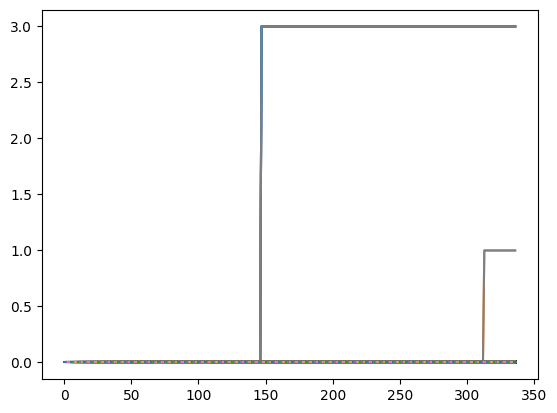

In [44]:
for ii in range(cause_of_death.shape[1]):
    plt.plot(cause_of_death[:,ii])

In [56]:
cause_of_death[-1,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 0.,
       3., 0., 0., 0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       3., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3.,
       0., 0., 0., 0., 0.

In [72]:
cause_of_death = cause_of_death[-1,:]

# count of particles that died due to [dryout, salinity, illumination]
count_dryout = np.sum(cause_of_death == 3)
count_salinity = np.sum(cause_of_death == 1)
count_illumination = np.sum(cause_of_death == 2)

count_alive = np.sum(cause_of_death == 0)
count_dead = np.sum(cause_of_death != 0)

In [77]:
print(f'| dryout \t| salinity \t| illumination \t| alive \t| dead \t|')
print(f'| {count_dryout} \t\t| {count_salinity} \t\t| {count_illumination} \t\t| {count_alive} \t\t| {count_dead} \t|')

| dryout 	| salinity 	| illumination 	| alive 	| dead 	|
| 8 		| 2 		| 0 		| 663 		| 10 	|


### 5.2 double check illumination averaging

In [45]:
path_to_dir = '/scratch/local1/output/22_11_01_depth_losses_v31'

for ii in [0]:

    case = get_case_info_files_from_dir(path_to_dir)[ii]

    case_info = read_case_info_file(case)
    # initial_radius = case_info['full_case_params']['class_dicts']['particle_properties']['radius']['initial_value']
    # stickiness = case_info['full_case_params']['class_dicts']['particle_properties']['collision_very_fine_silt']['stickyness']

    var_list = ['illumination','salinity','dryout','cause_of_death']

    track_data = load_track_data(case,var_list)

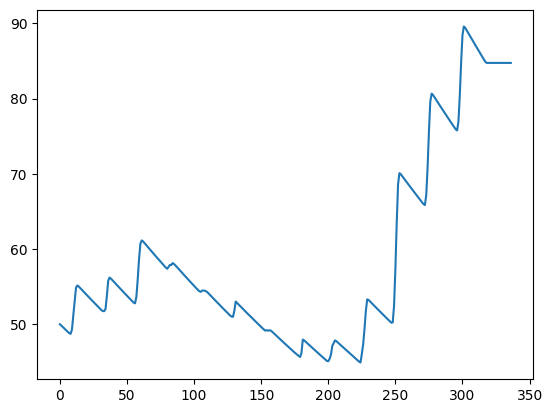

In [46]:
plt.plot(track_data['illumination'][:,0])

### 5.3 checking simplified version of cause of death

In [47]:
path_to_dir = '/scratch/local1/output/22_11_01_depth_losses_v31'

for ii in [0]:

    case = get_case_info_files_from_dir(path_to_dir)[ii]

    case_info = read_case_info_file(case)
    # initial_radius = case_info['full_case_params']['class_dicts']['particle_properties']['radius']['initial_value']
    # stickiness = case_info['full_case_params']['class_dicts']['particle_properties']['collision_very_fine_silt']['stickyness']

    var_list = ['illumination','salinity','dryout','cause_of_death']

    track_data = load_track_data(case,var_list)

In [48]:
status = track_data['status']
salinity = track_data['salinity']
dryout = track_data['dryout']
illumination = track_data['illumination']
cause_of_death = track_data['cause_of_death']

status.shape

(337, 673)

In [49]:
(cause_of_death == 3).any()

True

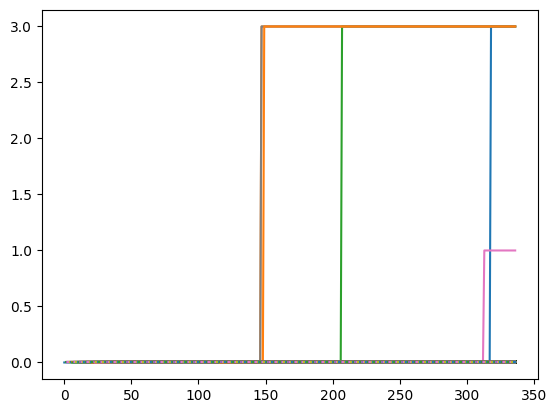

In [50]:
for ii in range(cause_of_death.shape[1]):
    plt.plot(cause_of_death[:,ii])

In [51]:
cause_of_death = cause_of_death[-1,:]

# count of particles that died due to [dryout, salinity, illumination]
count_dryout = np.sum(cause_of_death == 3)
count_salinity = np.sum(cause_of_death == 1)
count_illumination = np.sum(cause_of_death == 2)

count_alive = np.sum(cause_of_death == 0)
count_dead = np.sum(cause_of_death != 0)

In [52]:
print(f'| dryout \t| salinity \t| illumination \t| alive \t| dead \t|')
print(f'| {count_dryout} \t\t| {count_salinity} \t\t| {count_illumination} \t\t| {count_alive} \t\t| {count_dead} \t|')

| dryout 	| salinity 	| illumination 	| alive 	| dead 	|
| 5 		| 1 		| 0 		| 667 		| 6 	|


#### illumination

(array([15340., 15342., 15344., 15346., 15348., 15350., 15352., 15354.]),
 [Text(15340.0, 0, '2012-01-01'),
  Text(15342.0, 0, '2012-01-03'),
  Text(15344.0, 0, '2012-01-05'),
  Text(15346.0, 0, '2012-01-07'),
  Text(15348.0, 0, '2012-01-09'),
  Text(15350.0, 0, '2012-01-11'),
  Text(15352.0, 0, '2012-01-13'),
  Text(15354.0, 0, '2012-01-15')])

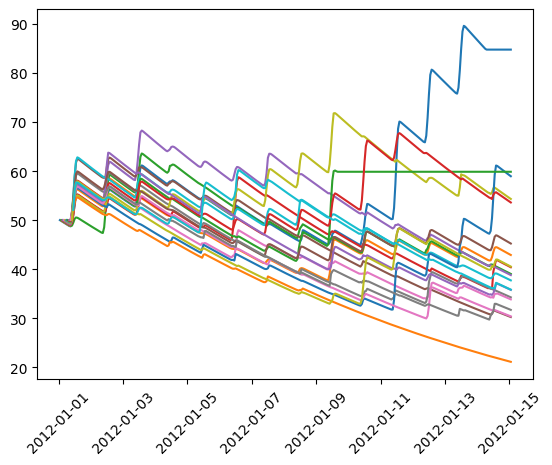

In [53]:
# for ii in range(track_data['illumination'].shape[1]):
time = track_data['time'].astype('datetime64[s]')
# from posix to datetime
time = time.astype(datetime.datetime)
for ii in range(20):    
    plt.plot(time,track_data['illumination'][:,ii])  

# rotate x-tick
plt.xticks(rotation=45)